#### From the states data, sum up the columns containing "Parent or guardian" (using the vectorized string operations to obtain those columns) to get a rough measure of disruptions to parenthood in each state. Then make a plot to compare this "parent or guardian" sum against one other feature. 
#### Then interpret your plot: what are the axes, the points, the features, the observations, and what can you conclude from the visualization.
- y-axis: % of the population with a mental illness
- x-axis: % of the populqation with a disruption to parenthood
- points: the % mental illness and % disruption to parenthood of a particular state
- features: % mental illness and % disruption
- observations: states at a particular point in time
- conclusion: There is a weak positive correlation between disruption to parenthood and mental illness. As disruptions to parenthood increase, mental illness typically increases

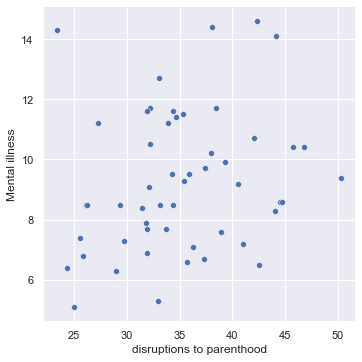

In [17]:
# import packages and data
import pandas as pd
import seaborn as sns
sns.set_theme()
states = pd.read_csv("../data/state_health.csv") 
states_named = states.set_index('State Name')

# Find the columns that contain parent or guardian
disruption_selector = states_named.columns.str.contains("Parent or guardian")

# Pull only those columns from the dataframe, and save it as a new dataframe
disruption_df = states_named.loc[:, disruption_selector]

# Sum those 3 columns, and add it as a new column named 'disruptions to parenthood' to states_named
states_named.insert(loc=len(states_named), column='disruptions to parenthood', value=disruption_df.sum(axis = 1))

# Make a plot that compares disruptions to parenthood and mental health
sns.relplot(data=states_named, x='disruptions to parenthood', y='Mental illness')